![](image_2.png)

# Business Case Study : Delhivery - Feature Engineering


**About Delhivery -**

    Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. 
    
    They aim to build the operating system for commerce, through a combination of world-class infrastructure, 
    
    logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.


    The Data team builds intelligence and capabilities using this data that helps them to widen the gap between 
    
    the quality, efficiency, and profitability of their business versus their competitors.



**Business Problem -**

    The company wants to understand and process the data coming out of data engineering pipelines:

    • Clean, sanitize and manipulate data to get useful features out of raw fields

    • Make sense out of the raw data and help the data science team to build forecasting models on it
    

_**Importing Python Libraries necessary while carrying out data exploration & visualisation**_ -
    

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import math

from scipy.stats import ttest_1samp, ttest_ind

from scipy.stats import ttest_ind     # Numeric vs categorical
from scipy.stats import ks_2samp
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import spearmanr, ttest_rel

import warnings
warnings.filterwarnings('ignore')


_**Upload & read csv file in pandas dataframe**_ -
    

In [2]:
df = pd.read_csv("delhivery_data.txt")


_**Inspecting Dataset & Analyzing Different Metrics**_ -
    

In [3]:
df.head()


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
df.tail()


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


_**Observations on**_ -
    
        1) shape of data
        
        2) data types
        
        3) Statistical summary
        

In [5]:
df.shape


(144867, 24)

    There are 24 columns & 144867 rows present in given dataset.
    

In [6]:
df.size


3476808

In [7]:
df.columns


Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [8]:
df.nunique()


data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [10]:
df.describe()


,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [11]:
df.describe(include = "object")


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


**Data Cleaning -** 
    
        Check for Missing values & Duplicates.
        

In [12]:
df.isna().sum().sort_values(ascending = False)


source_name                       293
destination_name                  261
data                                0
cutoff_factor                       0
segment_osrm_distance               0
segment_osrm_time                   0
segment_actual_time                 0
factor                              0
osrm_distance                       0
osrm_time                           0
actual_time                         0
actual_distance_to_destination      0
cutoff_timestamp                    0
is_cutoff                           0
trip_creation_time                  0
start_scan_to_end_scan              0
od_end_time                         0
od_start_time                       0
destination_center                  0
source_center                       0
trip_uuid                           0
route_type                          0
route_schedule_uuid                 0
segment_factor                      0
dtype: int64

    Missing values present in source_name & destination_name columns
    

In [13]:
df[df.duplicated()]


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


    No duplicate records are found.

**Changing the datatypes of attributes -**


            1) trip_creation_time - From object to datetime
            
            2) od_start_time -  From object to datetime
            
            3) od_end_time - From object to datetime
            
        

In [14]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])


In [15]:
df["od_start_time"] = pd.to_datetime(df["od_start_time"])


In [16]:
df["od_end_time"] = pd.to_datetime(df["od_end_time"])


**Checking the count of days, months and year -**


In [17]:
df["trip_creation_time"].dt.day_name().value_counts()


Wednesday    26732
Thursday     20481
Friday       20242
Tuesday      19961
Saturday     19936
Monday       19645
Sunday       17870
Name: trip_creation_time, dtype: int64

    Out of all day names, wednesday has maximum count

In [18]:
df["trip_creation_time"].dt.month_name().value_counts()


September    127349
October       17518
Name: trip_creation_time, dtype: int64

    The data corresponds to only two months i.e. September and october

In [19]:
df["trip_creation_time"].dt.year.value_counts()


2018    144867
Name: trip_creation_time, dtype: int64

    Data belongs to the year '2018'

**Visual Analysis -**

    Univariate Analysis - Histograms 
    

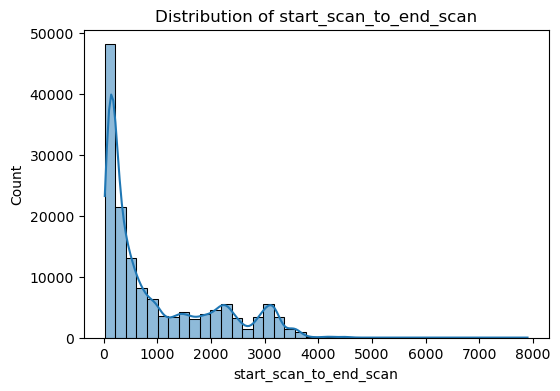

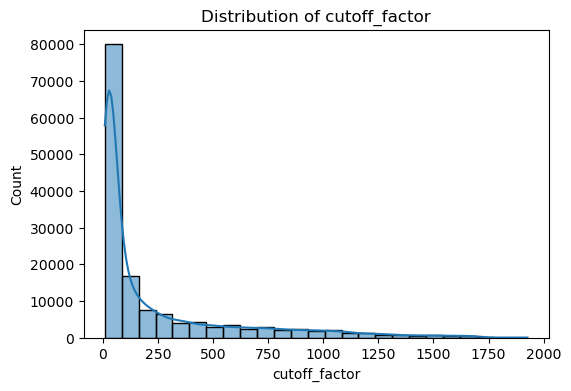

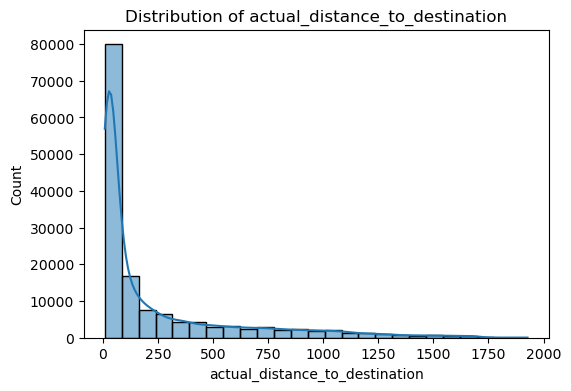

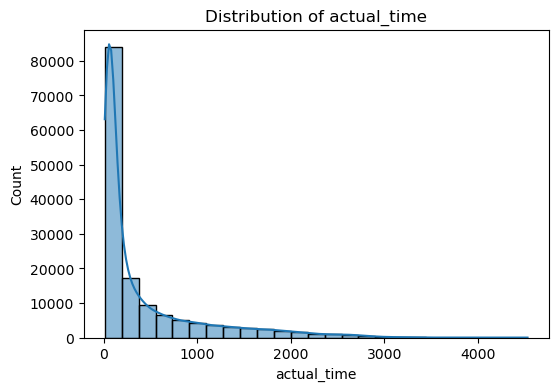

In [20]:
# start_scan_to_end_scan
plt.figure(figsize = (6, 4))
sns.histplot(x = "start_scan_to_end_scan", data = df, bins = 40, kde = True)
plt.title("Distribution of start_scan_to_end_scan")
plt.show()
# cutoff_factor
plt.figure(figsize = (6, 4))
sns.histplot(x = "cutoff_factor", data = df, bins = 25, kde = True)
plt.title("Distribution of cutoff_factor")
plt.show()
# actual_distance_to_destination  
plt.figure(figsize = (6, 4))
sns.histplot(x = "actual_distance_to_destination", data = df, bins = 25,  kde = True)
plt.title("Distribution of actual_distance_to_destination")
plt.show()
# actual_time 
plt.figure(figsize = (6, 4))
sns.histplot(x = "actual_time", data = df, bins = 25,  kde = True)
plt.title("Distribution of actual_time")
plt.show()


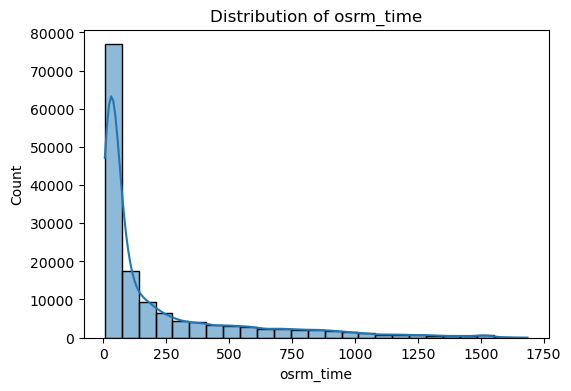

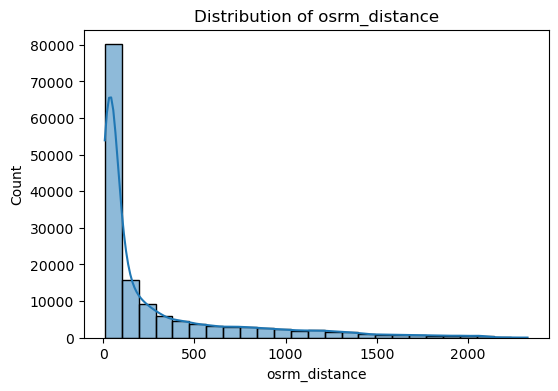

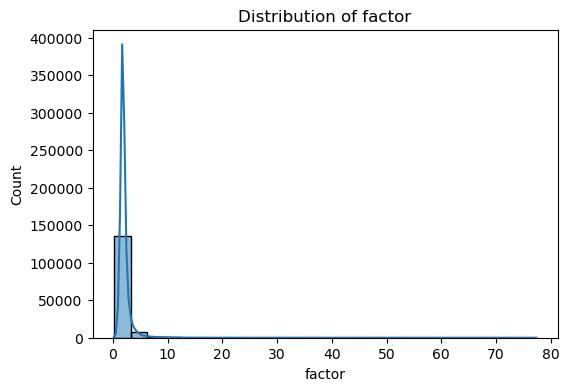

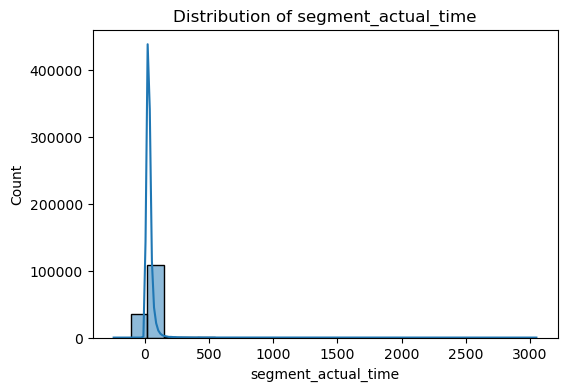

In [21]:
# osrm_time 
plt.figure(figsize = (6, 4))
sns.histplot(x = "osrm_time", data = df, bins = 25,  kde = True)
plt.title("Distribution of osrm_time")
plt.show()
# osrm_distance
plt.figure(figsize = (6, 4))
sns.histplot(x = "osrm_distance", data = df, bins = 25,  kde = True)
plt.title("Distribution of osrm_distance")
plt.show()
# factor
plt.figure(figsize = (6, 4))
sns.histplot(x = "factor", data = df, bins = 25,  kde = True)
plt.title("Distribution of factor")
plt.show()
# segment_actual_time
plt.figure(figsize = (6, 4))
sns.histplot(x = "segment_actual_time", data = df, bins = 25,  kde = True)
plt.title("Distribution of segment_actual_time")
plt.show()


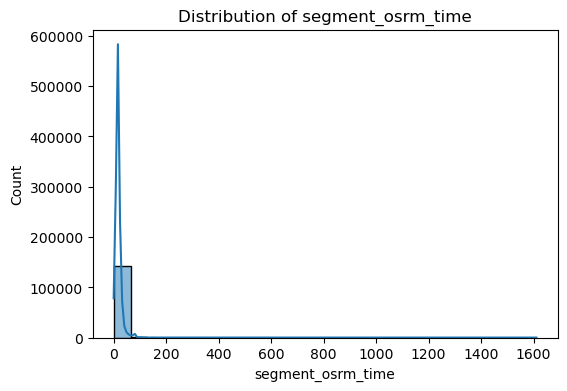

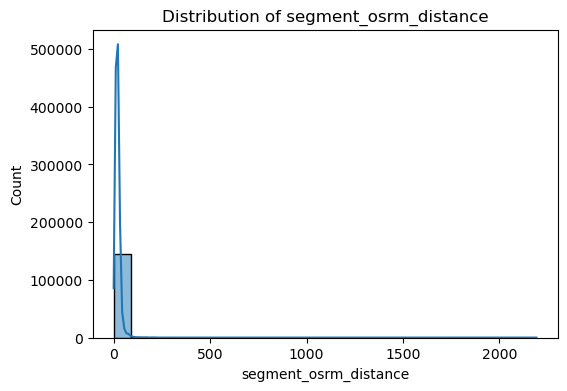

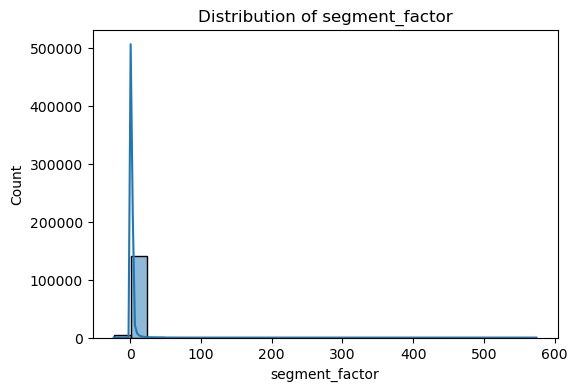

In [22]:
# segment_osrm_time
plt.figure(figsize = (6, 4))
sns.histplot(x = "segment_osrm_time", data = df, bins = 25,  kde = True)
plt.title("Distribution of segment_osrm_time")
plt.show()
# segment_osrm_distance
plt.figure(figsize = (6, 4))
sns.histplot(x = "segment_osrm_distance", data = df, bins = 25,  kde = True)
plt.title("Distribution of segment_osrm_distance")
plt.show()
# segment_factor
plt.figure(figsize = (6, 4))
sns.histplot(x = "segment_factor", data = df, bins = 25,  kde = True)
plt.title("Distribution of segment_factor")
plt.show()


    Box Plots -
    

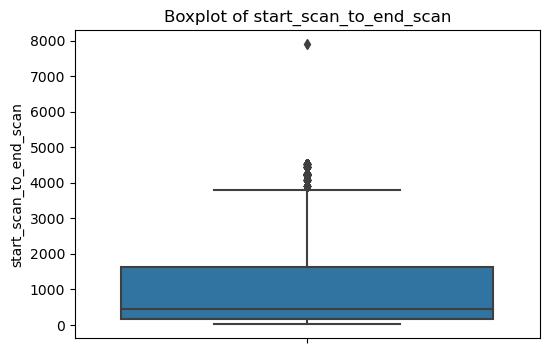

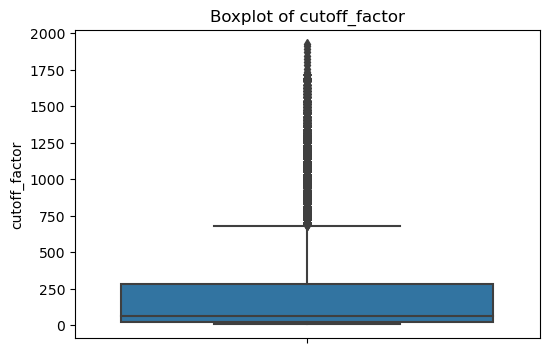

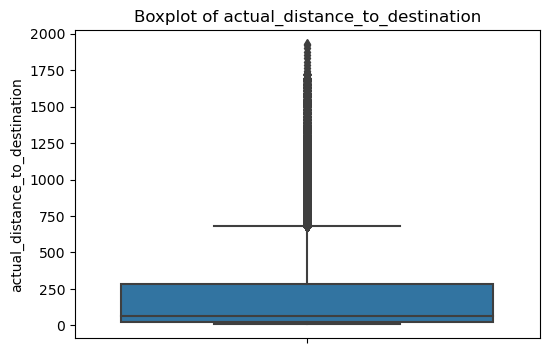

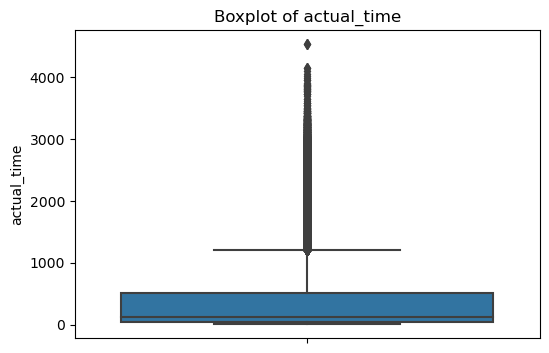

In [23]:
# start_scan_to_end_scan
plt.figure(figsize = (6, 4))
sns.boxplot(y = "start_scan_to_end_scan", data = df)
plt.title("Boxplot of start_scan_to_end_scan")
plt.show()
# cutoff_factor
plt.figure(figsize = (6, 4))
sns.boxplot(y = "cutoff_factor", data = df)
plt.title("Boxplot of cutoff_factor")
plt.show()
# actual_distance_to_destination  
plt.figure(figsize = (6, 4))
sns.boxplot(y = "actual_distance_to_destination", data = df)
plt.title("Boxplot of actual_distance_to_destination")
plt.show()
# actual_time 
plt.figure(figsize = (6, 4))
sns.boxplot(y = "actual_time", data = df)
plt.title("Boxplot of actual_time")
plt.show()


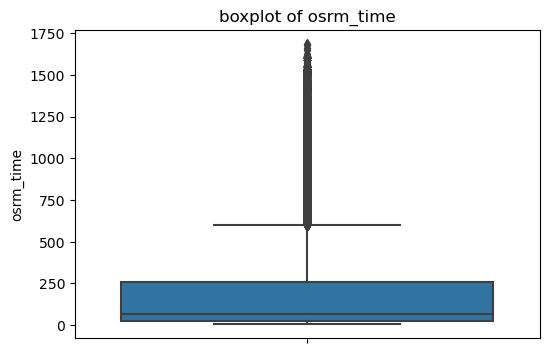

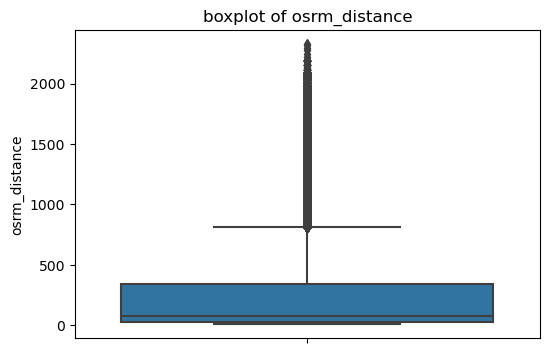

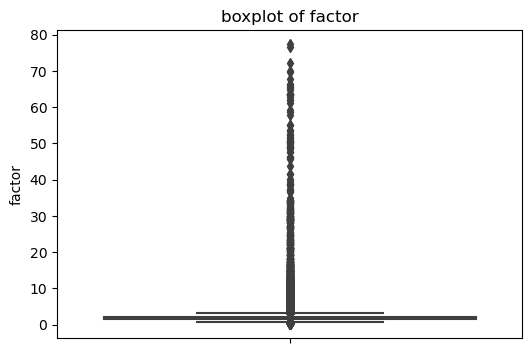

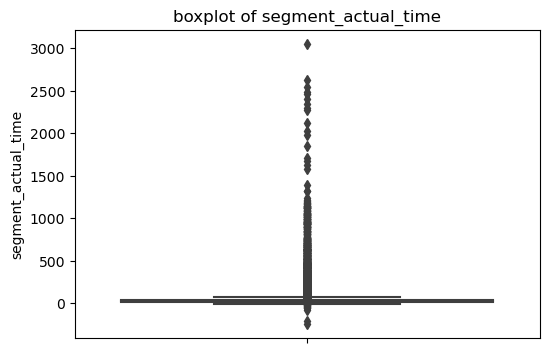

In [24]:
# osrm_time 
plt.figure(figsize = (6, 4))
sns.boxplot(y = "osrm_time", data = df)
plt.title("boxplot of osrm_time")
plt.show()
# osrm_distance
plt.figure(figsize = (6, 4))
sns.boxplot(y = "osrm_distance", data = df)
plt.title("boxplot of osrm_distance")
plt.show()
# factor
plt.figure(figsize = (6, 4))
sns.boxplot(y = "factor", data = df)
plt.title("boxplot of factor")
plt.show()
# segment_actual_time
plt.figure(figsize = (6, 4))
sns.boxplot(y = "segment_actual_time", data = df)
plt.title("boxplot of segment_actual_time")
plt.show()


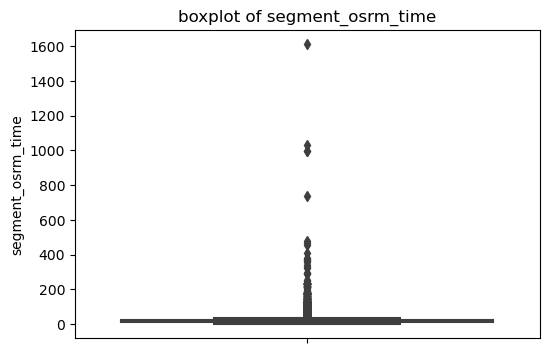

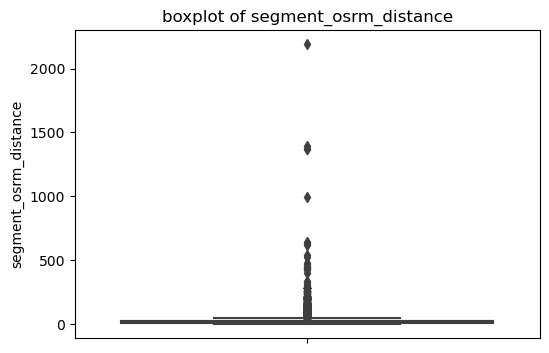

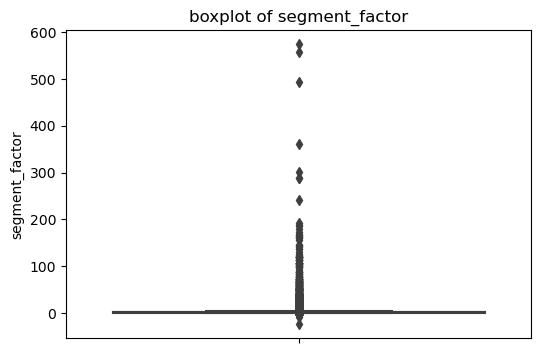

In [25]:
# segment_osrm_time
plt.figure(figsize = (6, 4))
sns.boxplot(y = "segment_osrm_time", data = df)
plt.title("boxplot of segment_osrm_time")
plt.show()
# segment_osrm_distance
plt.figure(figsize = (6, 4))
sns.boxplot(y = "segment_osrm_distance", data = df)
plt.title("boxplot of segment_osrm_distance")
plt.show()
# segment_factor
plt.figure(figsize = (6, 4))
sns.boxplot(y = "segment_factor", data = df)
plt.title("boxplot of segment_factor")
plt.show()


**Feature Creation -**


    Time taken between od_start and od_end -

In [26]:
df["Diff_betw_odstart_odend_1"] = (df["od_end_time"] - df["od_start_time"]) / pd.Timedelta(1,unit="hour")


    Extracting City, States & Pincodes from source & Destination -

In [27]:
df["source_city"] = df["source_name"].str.split(" ", n = 1, expand = True)[0].str.split("_", n = 1,expand = True)[0]
df["source_state"] = df["source_name"].str.split(" ", n = 1, expand = True)[1].str.replace("(","").str.replace(")","")


In [28]:
df["destination_city"] = df["destination_name"].str.split(" ", n = 1,expand = True)[0].str.split("_",n = 1,expand = True)[0]
df["destination_state"] = df["destination_name"].str.split(" ",n = 1,expand=True)[1].str.replace("(","").str.replace(")","")


In [29]:
df["source_pincode"] = df["source_center"].apply(lambda x : x[3:9] )
df["destination_pincode"] = df["destination_center"].apply(lambda x : x[3:9] )


    Time is converted into Hours -

In [30]:
df["start_scan_to_end_scan"] = df["start_scan_to_end_scan"] / 60

df["actual_time"] = df["actual_time"] / 60

df["osrm_time"] = df["osrm_time"] / 60

df["segment_actual_time"] = df["segment_actual_time"] / 60

df["segment_osrm_time"] = df["segment_osrm_time"] / 60


**Data Cleaning -**    
    
    After Extracting City & states from source & destination columns, 
    
    names of some of the states & cities are wrongly entered into the dataset.
    

In [31]:
df["source_state"].unique()


array(['Gujarat', 'Maharashtra', 'Karnataka', 'Punjab', 'Haryana',
       'Uttarakhand', 'Tamil Nadu', 'Rajasthan', nan, 'Telangana',
       'Madhya Pradesh', 'Uttar Pradesh', 'Himachal Pradesh', 'Kerala',
       'Andhra Pradesh', 'Bihar', 'Jharkhand', 'Hub Maharashtra', 'Assam',
       'West Bengal', 'Orissa', 'Delhi', 'Nagar_DC Rajasthan',
       'Jammu & Kashmir', 'Alipore_DPC West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Vadgaon Sheri DPC Maharashtra', 'Goa',
       '02_DPC Uttar Pradesh', 'MP Nagar Madhya Pradesh', 'Road Punjab',
       'Pondicherry', 'Layout PC Karnataka', 'Mandakni Madhya Pradesh',
       'Dadra and Nagar Haveli', 'DC Maharashtra', 'Arunachal Pradesh',
       'Antop Hill Maharashtra', 'City Madhya Pradesh',
       'Pashan DPC Maharashtra', 'Nagaland', 'Meghalaya', 'DC Rajasthan',
       'West _Dc Maharashtra', 'Nagar Uttar Pradesh',
       '_NAD Andhra Pradesh', 'Avenue_DPC West Bengal', 'Tripura',
       'Mizoram', 'Rahatani DPC Maharashtra', 'Balaji Naga

In [32]:
df["source_state"] = df["source_state"].replace(
                   { "Goa Goa":"Goa","Layout PC Karnataka":"Karnataka", "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                     "Pashan DPC Maharashtra":"Maharashtra", "City Madhya Pradesh":"Madhya Pradesh",
                     "02_DPC Uttar Pradesh":"Uttar Pradesh", "Nagar_DC Rajasthan":"Rajasthan",
                     "Alipore_DPC West Bengal":"West Bengal", "Mandakni Madhya Pradesh":"Madhya Pradesh",
                     "West _Dc Maharashtra":"Maharashtra", "DC Rajasthan":"Rajasthan", 
                     "MP Nagar Madhya Pradesh":"Madhya Pradesh", "Antop Hill Maharashtra":"Maharashtra",
                     "Avenue_DPC West Bengal":"West Bengal",  "Nagar Uttar Pradesh":"Uttar Pradesh",
                      "Balaji Nagar Maharashtra":"Maharashtra", "Kothanur_L Karnataka":"Karnataka",
                      "Rahatani DPC Maharashtra":"Maharashtra", "Mahim Maharashtra":"Maharashtra",
                      "DC Maharashtra":"Maharashtra", "_NAD Andhra Pradesh":"Andhra Pradesh" } )


In [33]:
df["destination_state"].unique()


array(['Gujarat', 'Maharashtra', 'Karnataka', 'Kerala', 'Punjab',
       'Uttarakhand', 'Tamil Nadu', 'Haryana', 'Rajasthan', nan,
       'Telangana', 'Uttar Pradesh', 'Delhi', 'Himachal Pradesh',
       'Hub Maharashtra', 'Andhra Pradesh', 'Bihar', 'Jharkhand', 'Assam',
       'Orissa', 'West Bengal', 'Pashan DPC Maharashtra',
       'Jammu & Kashmir', 'Madhya Pradesh', 'Avenue_DPC West Bengal',
       'Chandigarh', 'Chhattisgarh', 'Vadgaon Sheri DPC Maharashtra',
       '02_DPC Uttar Pradesh', 'Goa', 'MP Nagar Madhya Pradesh',
       'Pondicherry', 'Layout PC Karnataka', 'Mandakni Madhya Pradesh',
       'Arunachal Pradesh', 'Dadra and Nagar Haveli',
       'Nagar_DC Rajasthan', 'West _Dc Maharashtra',
       'Alipore_DPC West Bengal', 'Meghalaya', 'Rahatani DPC Maharashtra',
       'Nagar Uttar Pradesh', 'Kothanur_L Karnataka',
       'City Madhya Pradesh', 'Balaji Nagar Maharashtra', 'Tripura',
       'Mizoram', 'Daman & Diu', 'Nagaland', 'Goa Goa',
       'Antop Hill Maharashtra',

In [34]:
df["destination_state"] = df["destination_state"].replace(
                       { "Goa Goa":"Goa", "Layout PC Karnataka":"Karnataka", "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                         "Pashan DPC Maharashtra":"Maharashtra", "City Madhya Pradesh":"Madhya Pradesh",
                         "02_DPC Uttar Pradesh":"Uttar Pradesh", "Nagar_DC Rajasthan":"Rajasthan",
                         "Alipore_DPC West Bengal":"West Bengal", "Mandakni Madhya Pradesh":"Madhya Pradesh",
                         "West _Dc Maharashtra":"Maharashtra", "DC Rajasthan":"Rajasthan",
                         "MP Nagar Madhya Pradesh":"Madhya Pradesh", "Antop Hill Maharashtra":"Maharashtra",
                         "Avenue_DPC West Bengal":"West Bengal", "Nagar Uttar Pradesh":"Uttar Pradesh",
                         "Balaji Nagar Maharashtra":"Maharashtra", "Kothanur_L Karnataka":"Karnataka",
                         "Rahatani DPC Maharashtra":"Maharashtra", "Mahim Maharashtra":"Maharashtra",
                         "DC Maharashtra":"Maharashtra", "_NAD Andhra Pradesh":"Andhra Pradesh",
                         "Delhi Delhi":"Delhi", "West_Dc Maharashtra":"Maharashtra", "Hub Maharashtra":"Maharashtra"   } )


In [35]:
df["source_city"].unique()[:100]


array(['Anand', 'Khambhat', 'Bhiwandi', 'LowerParel', 'Bangalore',
       'Bengaluru', 'Ludhiana', 'Jagraon', 'Raikot', 'Junagadh',
       'Veraval', 'Kodinar', 'Una', 'Talala', 'Sonipat', 'Roorkee',
       'Haridwar', 'MAA', 'Jalandhar', 'Gurgaon', 'Jaipur', 'Ajmer',
       'Pali', 'Jodhpur', 'Piparcity', nan, 'Hyderabad', 'Bhopal',
       'Kanpur', 'Auraiya', 'Etawah', 'Ahmedabad', 'Surat', 'Nanded',
       'Loha', 'Gangakher', 'Parli', 'Ambajogai', 'Mumbai', 'Loharu',
       'ChrkhiDdri', 'Boisar', 'Dahanu', 'Hapur', 'Bangana', 'Nadaun',
       'Balotra', 'Pokhran', 'Phalodi', 'Mehsana', 'Unjha', 'Patan',
       'Bhabhar', 'AMD', 'Aluva', 'Cochin', 'Pune', 'Solapur', 'Kakinada',
       'Tuni', 'Purnia', 'Supaul', 'Saharsa', 'Madhepura', 'Triveninganj',
       'Visakhapatnam', 'Anakapalle', 'Narsiptnm', 'Ranchi', 'Ramgarh',
       'Hazaribag', 'JhumriTlya', 'Beawar', 'Bilara', 'Bijainagar',
       'Kekri', 'Nasirabad', 'Bhuvanagiri', 'Mothkur', 'Thirumalagiri',
       'Madhupur', 'Kh

In [36]:
df["source_city"] = df["source_city"].replace(
                 {  "del":"Delhi", "Bangalore":"Bengaluru",  "AMD":"Ahmedabad",  "Amdavad":"Ahmedabad" }  )
      

In [37]:
df["destination_city"] = df["destination_city"].replace(
                 {  "del":"Delhi", "Bangalore":"Bengaluru",  "AMD":"Ahmedabad",  "Amdavad":"Ahmedabad" }  )
      


    Create Feature by combining state & City -

In [38]:
df["source_city_state"] = df["source_city"] + " " + df["source_state"]

df["destination_city_state"] = df["destination_city"] + " " + df["destination_state"]


    From above data, we can say that company is covering nearly all the cities of all the states.
    

**Merging of rows and aggregation field -**


    Before merging datapoints of dataset, we will first make a copy of the dataset into some other dataframe
    
    & then we will drop the unnecessary columns 
    

In [39]:
df_copy = df.copy()


In [40]:
df_copy.shape


(144867, 33)

In [44]:
df_copy.drop(  ['source_center',"source_name","destination_center",
             "destination_name","cutoff_timestamp", "od_end_time","od_start_time"],  axis = 1,  inplace=True)


In [47]:
df_copy.columns


Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'Diff_betw_odstart_odend_1',
       'source_city', 'source_state', 'destination_city', 'destination_state',
       'source_pincode', 'destination_pincode', 'source_city_state',
       'destination_city_state'],
      dtype='object')

In [48]:
df_copy.shape


(144867, 26)

    Now, we will merge the rows of datasets
    

In [62]:
actual_time = (df_copy.groupby(["trip_uuid", "start_scan_to_end_scan"])["actual_time"].max().reset_index()
               .groupby("trip_uuid")["actual_time"].sum().reset_index())
actual_time.head()


,trip_uuid,actual_time
0,trip-153671041653548748,26.033333
1,trip-153671042288605164,2.383333
2,trip-153671043369099517,55.783333
3,trip-153671046011330457,0.983333
4,trip-153671052974046625,5.683333


In [61]:
segment_osrm_time = df_copy[["trip_uuid","segment_osrm_time"]].groupby("trip_uuid")["segment_osrm_time"].sum().reset_index()
segment_osrm_time.head()


,trip_uuid,segment_osrm_time
0,trip-153671041653548748,16.800000
1,trip-153671042288605164,1.083333
2,trip-153671043369099517,32.350000
3,trip-153671046011330457,0.266667
4,trip-153671052974046625,1.916667


In [64]:
segment_actual_time = df_copy.groupby("trip_uuid")["segment_actual_time"].sum().reset_index()
segment_actual_time.head()


,trip_uuid,segment_actual_time
0,trip-153671041653548748,25.800000
1,trip-153671042288605164,2.350000
2,trip-153671043369099517,55.133333
3,trip-153671046011330457,0.983333
4,trip-153671052974046625,5.666667


In [66]:
osrm_time = (df_copy.groupby(["trip_uuid", "start_scan_to_end_scan"])["osrm_time"].max().reset_index()
             .groupby("trip_uuid")["osrm_time"].sum().reset_index())
osrm_time.head()


,trip_uuid,osrm_time
0,trip-153671041653548748,12.383333
1,trip-153671042288605164,1.133333
2,trip-153671043369099517,29.016667
3,trip-153671046011330457,0.250000
4,trip-153671052974046625,1.950000


In [85]:
time_btwn_odstart_and_od_end = df_copy.groupby("trip_uuid")["Diff_betw_odstart_odend_1"].unique().reset_index()
time_btwn_odstart_and_od_end.head()


,trip_uuid,Diff_betw_odstart_odend_1
0,trip-153671041653548748,"[16.65842298, 21.0100736875]"
1,trip-153671042288605164,"[2.0463247669444447, 0.9805397955555556]"
2,trip-153671043369099517,"[51.662059856388886, 13.910648811388889]"
3,trip-153671046011330457,[1.6749155866666667]
4,trip-153671052974046625,"[2.5335485744444446, 1.3423885633333332, 8.096..."


In [86]:
time_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"] = (
                                                            time_btwn_odstart_and_od_end["Diff_betw_odstart_odend_1"]
                                                            .apply(sum))

time_btwn_odstart_and_od_end.head()


,trip_uuid,Diff_betw_odstart_odend_1,time_taken_btwn_odstart_and_od_end
0,trip-153671041653548748,"[16.65842298, 21.0100736875]",37.668497
1,trip-153671042288605164,"[2.0463247669444447, 0.9805397955555556]",3.026865
2,trip-153671043369099517,"[51.662059856388886, 13.910648811388889]",65.572709
3,trip-153671046011330457,[1.6749155866666667],1.674916
4,trip-153671052974046625,"[2.5335485744444446, 1.3423885633333332, 8.096...",11.972484


In [87]:
start_scan_to_end_scan = ((df_copy.groupby("trip_uuid")["start_scan_to_end_scan"].unique())).reset_index()
start_scan_to_end_scan.head()


,trip_uuid,start_scan_to_end_scan
0,trip-153671041653548748,"[16.65, 21.0]"
1,trip-153671042288605164,"[2.033333333333333, 0.9666666666666667]"
2,trip-153671043369099517,"[51.65, 13.9]"
3,trip-153671046011330457,[1.6666666666666667]
4,trip-153671052974046625,"[2.533333333333333, 1.3333333333333333, 8.0833..."


In [88]:
start_scan_to_end_scan["start_scan_to_end_scan"] = start_scan_to_end_scan["start_scan_to_end_scan"].apply(sum) 
start_scan_to_end_scan.head()


,trip_uuid,start_scan_to_end_scan
0,trip-153671041653548748,37.650000
1,trip-153671042288605164,3.000000
2,trip-153671043369099517,65.550000
3,trip-153671046011330457,1.666667
4,trip-153671052974046625,11.950000


In [91]:
osrm_distance = (df_copy.groupby(["trip_uuid", "start_scan_to_end_scan"])["osrm_distance"].max().reset_index()
                .groupby("trip_uuid")["osrm_distance"].sum().reset_index())

osrm_distance.head()


,trip_uuid,osrm_distance
0,trip-153671041653548748,991.3523
1,trip-153671042288605164,85.1110
2,trip-153671043369099517,2372.0852
3,trip-153671046011330457,19.6800
4,trip-153671052974046625,146.7918


In [93]:
actual_distance_to_destination = (df_copy.groupby(["trip_uuid", "start_scan_to_end_scan"])
                                  ["actual_distance_to_destination"].max().reset_index()
                                  .groupby("trip_uuid")["actual_distance_to_destination"].sum().reset_index() )

actual_distance_to_destination.head()


,trip_uuid,actual_distance_to_destination
0,trip-153671041653548748,824.732854
1,trip-153671042288605164,73.186911
2,trip-153671043369099517,1932.273969
3,trip-153671046011330457,17.175274
4,trip-153671052974046625,127.448500


In [95]:
segment_osrm_distance = ( df_copy[["trip_uuid", "segment_osrm_distance"]]
                         .groupby("trip_uuid")["segment_osrm_distance"].sum().reset_index() )

segment_osrm_distance.head()


,trip_uuid,segment_osrm_distance
0,trip-153671041653548748,1320.4733
1,trip-153671042288605164,84.1894
2,trip-153671043369099517,2545.2678
3,trip-153671046011330457,19.8766
4,trip-153671052974046625,146.7919


**Comparison of distance & time fields -**


In [97]:
distance = segment_osrm_distance.merge(
                                        actual_distance_to_destination.merge(osrm_distance, on = "trip_uuid") 
                                ,on = "trip_uuid")
distance.head()


,trip_uuid,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,trip-153671041653548748,1320.4733,824.732854,991.3523
1,trip-153671042288605164,84.1894,73.186911,85.1110
2,trip-153671043369099517,2545.2678,1932.273969,2372.0852
3,trip-153671046011330457,19.8766,17.175274,19.6800
4,trip-153671052974046625,146.7919,127.448500,146.7918


In [104]:
time = segment_osrm_time.merge(
    
            osrm_time.merge(
                
                segment_actual_time.merge(
                
                        actual_time.merge(
                    
                            time_btwn_odstart_and_od_end.merge(
                        
                                         start_scan_to_end_scan, on="trip_uuid"),
                    
                         on="trip_uuid"),
                
                on="trip_uuid"),
                            
            on="trip_uuid"),
    
        on="trip_uuid")

time.head()


,trip_uuid,segment_osrm_time,osrm_time,segment_actual_time,actual_time,Diff_betw_odstart_odend_1,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan
0,trip-153671041653548748,16.800000,12.383333,25.800000,26.033333,"[16.65842298, 21.0100736875]",37.668497,37.650000
1,trip-153671042288605164,1.083333,1.133333,2.350000,2.383333,"[2.0463247669444447, 0.9805397955555556]",3.026865,3.000000
2,trip-153671043369099517,32.350000,29.016667,55.133333,55.783333,"[51.662059856388886, 13.910648811388889]",65.572709,65.550000
3,trip-153671046011330457,0.266667,0.250000,0.983333,0.983333,[1.6749155866666667],1.674916,1.666667
4,trip-153671052974046625,1.916667,1.950000,5.666667,5.683333,"[2.5335485744444446, 1.3423885633333332, 8.096...",11.972484,11.950000


In [105]:
merge_data = time.merge(distance,on="trip_uuid")
merge_data.head()


,trip_uuid,segment_osrm_time,osrm_time,segment_actual_time,actual_time,Diff_betw_odstart_odend_1,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,trip-153671041653548748,16.800000,12.383333,25.800000,26.033333,"[16.65842298, 21.0100736875]",37.668497,37.650000,1320.4733,824.732854,991.3523
1,trip-153671042288605164,1.083333,1.133333,2.350000,2.383333,"[2.0463247669444447, 0.9805397955555556]",3.026865,3.000000,84.1894,73.186911,85.1110
2,trip-153671043369099517,32.350000,29.016667,55.133333,55.783333,"[51.662059856388886, 13.910648811388889]",65.572709,65.550000,2545.2678,1932.273969,2372.0852
3,trip-153671046011330457,0.266667,0.250000,0.983333,0.983333,[1.6749155866666667],1.674916,1.666667,19.8766,17.175274,19.6800
4,trip-153671052974046625,1.916667,1.950000,5.666667,5.683333,"[2.5335485744444446, 1.3423885633333332, 8.096...",11.972484,11.950000,146.7919,127.448500,146.7918


In [106]:
city = df_copy.groupby("trip_uuid")[["source_city", "destination_city"]].aggregate(
                    { "source_city":pd.unique,
                      "destination_city":pd.unique  })
city.head()


,source_city,destination_city
trip_uuid,,
trip-153671041653548748,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]"
trip-153671042288605164,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]"
trip-153671043369099517,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]"
trip-153671046011330457,[Mumbai],[Mumbai]
trip-153671052974046625,"[Bellary, Hospet, Sandur]","[Hospet, Sandur, Bellary]"


In [108]:
state = df_copy.groupby("trip_uuid")[["source_state", "destination_state"]].aggregate(
                    {"source_state":pd.unique,
                      "destination_state":pd.unique })
state.head()


,source_state,destination_state
trip_uuid,,
trip-153671041653548748,"[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]"
trip-153671042288605164,[Karnataka],[Karnataka]
trip-153671043369099517,"[Karnataka, Haryana]","[Haryana, Punjab]"
trip-153671046011330457,[Hub Maharashtra],[Maharashtra]
trip-153671052974046625,[Karnataka],[Karnataka]


In [110]:
city_state = df_copy.groupby("trip_uuid")[["source_city_state", "destination_city_state"]].aggregate(
                { "source_city_state":pd.unique,
                    "destination_city_state":pd.unique })
city_state.head()


,source_city_state,destination_city_state
trip_uuid,,
trip-153671041653548748,"[Bhopal Madhya Pradesh, Kanpur Uttar Pradesh]","[Kanpur Uttar Pradesh, Gurgaon Haryana]"
trip-153671042288605164,"[Tumkur Karnataka, Doddablpur Karnataka]","[Doddablpur Karnataka, Chikblapur Karnataka]"
trip-153671043369099517,"[Bengaluru Karnataka, Gurgaon Haryana]","[Gurgaon Haryana, Chandigarh Punjab]"
trip-153671046011330457,[Mumbai Hub Maharashtra],[Mumbai Maharashtra]
trip-153671052974046625,"[Bellary Karnataka, Hospet Karnataka, Sandur K...","[Hospet Karnataka, Sandur Karnataka, Bellary K..."


In [111]:
locations = city.merge(
                        city_state.merge(state, on = "trip_uuid", how = "outer"),
            on = "trip_uuid", how = "outer")

locations.head()


,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state
trip_uuid,,,,,,
trip-153671041653548748,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Bhopal Madhya Pradesh, Kanpur Uttar Pradesh]","[Kanpur Uttar Pradesh, Gurgaon Haryana]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]"
trip-153671042288605164,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]","[Tumkur Karnataka, Doddablpur Karnataka]","[Doddablpur Karnataka, Chikblapur Karnataka]",[Karnataka],[Karnataka]
trip-153671043369099517,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Bengaluru Karnataka, Gurgaon Haryana]","[Gurgaon Haryana, Chandigarh Punjab]","[Karnataka, Haryana]","[Haryana, Punjab]"
trip-153671046011330457,[Mumbai],[Mumbai],[Mumbai Hub Maharashtra],[Mumbai Maharashtra],[Hub Maharashtra],[Maharashtra]
trip-153671052974046625,"[Bellary, Hospet, Sandur]","[Hospet, Sandur, Bellary]","[Bellary Karnataka, Hospet Karnataka, Sandur K...","[Hospet Karnataka, Sandur Karnataka, Bellary K...",[Karnataka],[Karnataka]


In [112]:
route_type = df_copy.groupby("trip_uuid")["route_type"].unique().reset_index()
route_type.head()


,trip_uuid,route_type
0,trip-153671041653548748,[FTL]
1,trip-153671042288605164,[Carting]
2,trip-153671043369099517,[FTL]
3,trip-153671046011330457,[Carting]
4,trip-153671052974046625,[FTL]


In [114]:
merged_route = route_type.merge(
                        locations.merge(
                                merge_data, on = "trip_uuid", how = "outer"),
                         on="trip_uuid", how = "outer")

merged_route.head()


,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,Diff_betw_odstart_odend_1,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,trip-153671041653548748,[FTL],"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Bhopal Madhya Pradesh, Kanpur Uttar Pradesh]","[Kanpur Uttar Pradesh, Gurgaon Haryana]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]",16.800000,12.383333,25.800000,26.033333,"[16.65842298, 21.0100736875]",37.668497,37.650000,1320.4733,824.732854,991.3523
1,trip-153671042288605164,[Carting],"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]","[Tumkur Karnataka, Doddablpur Karnataka]","[Doddablpur Karnataka, Chikblapur Karnataka]",[Karnataka],[Karnataka],1.083333,1.133333,2.350000,2.383333,"[2.0463247669444447, 0.9805397955555556]",3.026865,3.000000,84.1894,73.186911,85.1110
2,trip-153671043369099517,[FTL],"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Bengaluru Karnataka, Gurgaon Haryana]","[Gurgaon Haryana, Chandigarh Punjab]","[Karnataka, Haryana]","[Haryana, Punjab]",32.350000,29.016667,55.133333,55.783333,"[51.662059856388886, 13.910648811388889]",65.572709,65.550000,2545.2678,1932.273969,2372.0852
3,trip-153671046011330457,[Carting],[Mumbai],[Mumbai],[Mumbai Hub Maharashtra],[Mumbai Maharashtra],[Hub Maharashtra],[Maharashtra],0.266667,0.250000,0.983333,0.983333,[1.6749155866666667],1.674916,1.666667,19.8766,17.175274,19.6800
4,trip-153671052974046625,[FTL],"[Bellary, Hospet, Sandur]","[Hospet, Sandur, Bellary]","[Bellary Karnataka, Hospet Karnataka, Sandur K...","[Hospet Karnataka, Sandur Karnataka, Bellary K...",[Karnataka],[Karnataka],1.916667,1.950000,5.666667,5.683333,"[2.5335485744444446, 1.3423885633333332, 8.096...",11.972484,11.950000,146.7919,127.448500,146.7918


In [117]:
trips = merged_route.copy()

trips["route_type"] = trips["route_type"].apply(lambda x:x[0])

route_to_merge = df_copy.groupby("trip_uuid")["route_schedule_uuid"].unique().reset_index()

trips = trips.merge(route_to_merge, on = "trip_uuid", how = "outer")

trips["route_schedule_uuid"] = trips["route_schedule_uuid"].apply(lambda x:x[0])

trips.head()


,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,Diff_betw_odstart_odend_1,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Bhopal Madhya Pradesh, Kanpur Uttar Pradesh]","[Kanpur Uttar Pradesh, Gurgaon Haryana]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]",16.800000,12.383333,25.800000,26.033333,"[16.65842298, 21.0100736875]",37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]","[Tumkur Karnataka, Doddablpur Karnataka]","[Doddablpur Karnataka, Chikblapur Karnataka]",[Karnataka],[Karnataka],1.083333,1.133333,2.350000,2.383333,"[2.0463247669444447, 0.9805397955555556]",3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
2,trip-153671043369099517,FTL,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Bengaluru Karnataka, Gurgaon Haryana]","[Gurgaon Haryana, Chandigarh Punjab]","[Karnataka, Haryana]","[Haryana, Punjab]",32.350000,29.016667,55.133333,55.783333,"[51.662059856388886, 13.910648811388889]",65.572709,65.550000,2545.2678,1932.273969,2372.0852,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...
3,trip-153671046011330457,Carting,[Mumbai],[Mumbai],[Mumbai Hub Maharashtra],[Mumbai Maharashtra],[Hub Maharashtra],[Maharashtra],0.266667,0.250000,0.983333,0.983333,[1.6749155866666667],1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,"[Bellary, Hospet, Sandur]","[Hospet, Sandur, Bellary]","[Bellary Karnataka, Hospet Karnataka, Sandur K...","[Hospet Karnataka, Sandur Karnataka, Bellary K...",[Karnataka],[Karnataka],1.916667,1.950000,5.666667,5.683333,"[2.5335485744444446, 1.3423885633333332, 8.096...",11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...


In [119]:
trips["source_city"] = trips["source_city"].astype("str").str.strip("[]").str.replace("'","")

trips["destination_city"] = trips["destination_city"].astype("str").str.strip("[]").str.replace("'","")

trips["source_city_state"] = trips["source_city_state"].astype("str").str.strip("[]").str.replace("'","")

trips["destination_city_state"] = trips["destination_city_state"].astype("str").str.strip("[]").str.replace("'","")

trips["source_state"] = trips["source_state"].astype("str").str.strip("[]").str.replace("'","")

trips["destination_state"] = trips["destination_state"].astype("str").str.strip("[]").str.replace("'","")


In [120]:
trips.head()


,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,Diff_betw_odstart_odend_1,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Bhopal Madhya Pradesh Kanpur Uttar Pradesh,Kanpur Uttar Pradesh Gurgaon Haryana,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,16.800000,12.383333,25.800000,26.033333,"[16.65842298, 21.0100736875]",37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,Tumkur Doddablpur,Doddablpur Chikblapur,Tumkur Karnataka Doddablpur Karnataka,Doddablpur Karnataka Chikblapur Karnataka,Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,"[2.0463247669444447, 0.9805397955555556]",3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Bengaluru Karnataka Gurgaon Haryana,Gurgaon Haryana Chandigarh Punjab,Karnataka Haryana,Haryana Punjab,32.350000,29.016667,55.133333,55.783333,"[51.662059856388886, 13.910648811388889]",65.572709,65.550000,2545.2678,1932.273969,2372.0852,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,Mumbai Hub Maharashtra,Mumbai Maharashtra,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,[1.6749155866666667],1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,Bellary Hospet Sandur,Hospet Sandur Bellary,Bellary Karnataka Hospet Karnataka Sandur Karn...,Hospet Karnataka Sandur Karnataka Bellary Karn...,Karnataka,Karnataka,1.916667,1.950000,5.666667,5.683333,"[2.5335485744444446, 1.3423885633333332, 8.096...",11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...


**Outliers (Detection & Treatment) -**


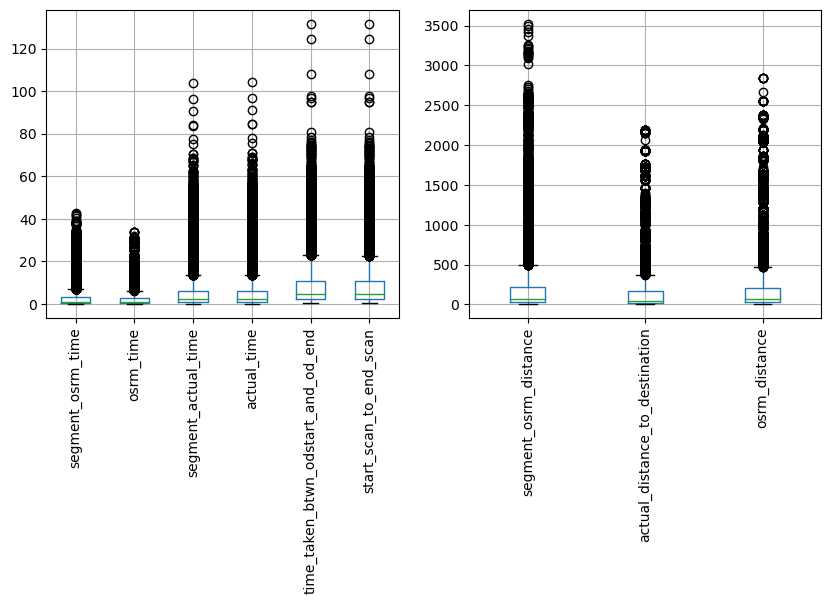

In [236]:
plt.figure(figsize = (10,4))

plt.subplot(121)
trips[['segment_osrm_time', 'osrm_time', 'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation = 90)

plt.subplot(122)
trips[['segment_osrm_distance', 'actual_distance_to_destination', 'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()


In [224]:
outliers  = trips.copy()


In [227]:
num_col = outliers[['segment_osrm_time', 'osrm_time', 'segment_actual_time', 'actual_time',
                                   'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan',
                                    'segment_osrm_distance', 'actual_distance_to_destination', 'osrm_distance']]
num_col.describe()


,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,3.015830,2.697314,5.898205,5.945177,8.861857,8.835778,223.201161,164.473322,204.836725
std,5.242367,4.537654,9.270799,9.355548,10.981666,10.976286,416.628374,305.540829,370.749275
min,0.100000,0.100000,0.150000,0.150000,0.391024,0.383333,9.072900,9.002461,9.072900
25%,0.516667,0.483333,1.100000,1.116667,2.498843,2.483333,32.654500,22.856947,30.935900
50%,1.083333,1.000000,2.450000,2.483333,4.679427,4.650000,70.154400,48.461876,65.852600
75%,3.083333,2.816667,6.116667,6.133333,10.636651,10.583333,218.802400,164.154696,208.417000
max,42.733333,33.866667,103.833333,104.416667,131.642533,131.633333,3523.632400,2187.483994,2840.081000


In [228]:
Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)

IQR = Q3 - Q1

In [229]:
outlier_free = num_col[-( (num_col < (Q1 - 1.5 * IQR)) | (num_col > (Q3 + 1.5 * IQR)) ).any(axis=1)]
outlier_free = outlier_free.reset_index(drop=True) 


In [230]:
outlier_free


,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110
1,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800
2,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918
3,0.383333,0.383333,1.000000,1.016667,3.174797,3.150000,28.0647,24.597048,28.0647
4,0.216667,0.216667,0.400000,0.400000,1.633427,1.633333,12.0184,9.100510,12.0184
...,...,...,...,...,...,...,...,...,...
12753,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630
12754,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882
12755,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841
12756,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635


**Hypothesis Testing for checking relation between different aggregated fields -**


    1) Hypothesis Test Between (Difference between od_start_time & od_end_time) vs (start_scan_to_end_scan)
    
        H0 : Mean of time taken is same

        Ha : Mean of time taken is different


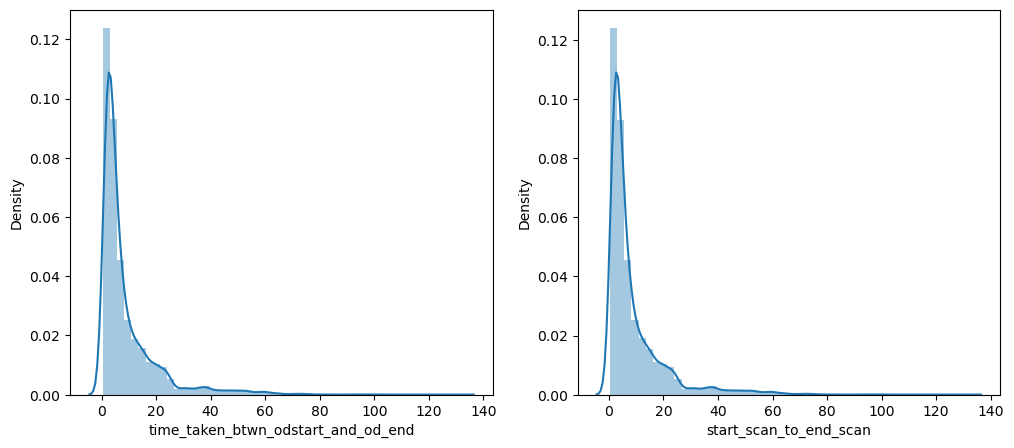

In [133]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.distplot(time_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"])

plt.subplot(122)
sns.distplot(start_scan_to_end_scan["start_scan_to_end_scan"])

plt.show()


In [154]:
# Ks Test -
# H0 : The distribution are same
# Ha : The distribution are different

ks_2samp(time_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]
               ,start_scan_to_end_scan["start_scan_to_end_scan"])


KstestResult(statistic=0.004184382803536474, pvalue=0.9994337058695081, statistic_location=2.466666666666667, statistic_sign=-1)

    As p_value is greater than significance level, so we fail to reject null hypothesis
    

In [146]:
ttest_ind( (time_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(2000))
                ,(start_scan_to_end_scan["start_scan_to_end_scan"].sample(2000)) )


Ttest_indResult(statistic=0.9585763852532264, pvalue=0.33783015700559227)

    Significance Level = 0.05 (5%)
    
    As p_value is greater than significance level, so we fail to reject null hypothesis
    
    which means Mean of time is same.
    

    2) Hypothesis Test Between (Actual Time) vs (OSRM Time)
    
        H0 : Mean of OSRM time >= Mean of Actual Time

        Ha : Mean OSRM time < Mean of Actual time


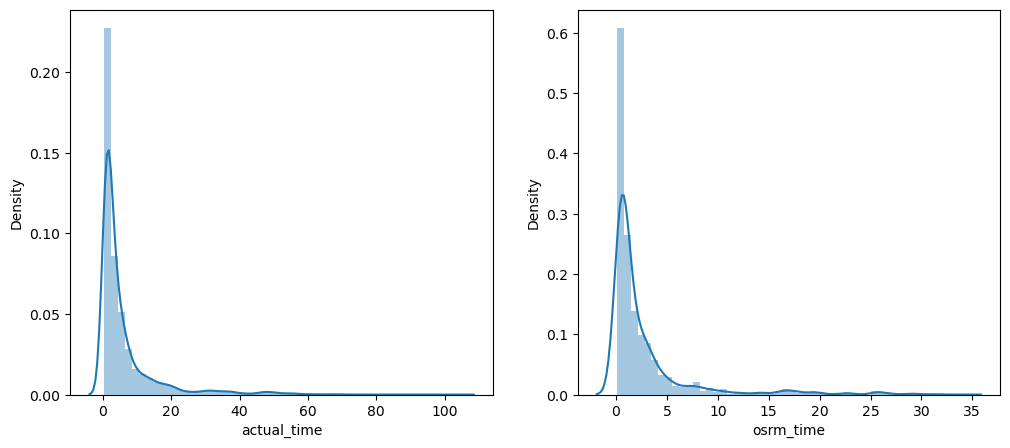

In [134]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.distplot(actual_time["actual_time"])

plt.subplot(122)
sns.distplot(osrm_time["osrm_time"])

plt.show()


In [153]:
# Ks Test -
# H0 : The distribution are same
# Ha : The distribution are different

ks_2samp(actual_time["actual_time"], osrm_time["osrm_time"])


KstestResult(statistic=0.2945265573327934, pvalue=0.0, statistic_location=0.6833333333333333, statistic_sign=-1)

In [145]:
ttest_ind(actual_time["actual_time"].sample(2000), osrm_time["osrm_time"].sample(2000), alternative='greater')


Ttest_indResult(statistic=14.37919714397133, pvalue=4.751230510561993e-46)

    Significance Level = 0.05 (5%)
    
    As p_value is lesser than significance level, so we reject null hypothesis
    
    which means Mean of OSRM time is less than actual time.
    

    3) Hypothesis Test Between (Actual Time) vs (Segment Actual Time)
    
        H0 : Mean of both times taken are same

        Ha : Mean Segment Actual time is different than Mean of Actual time


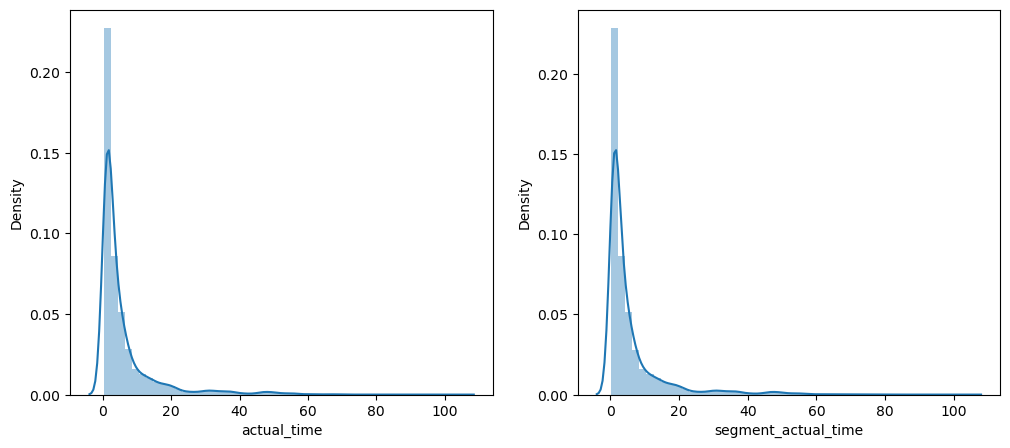

In [143]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.distplot(actual_time["actual_time"])

plt.subplot(122)
sns.distplot(segment_actual_time["segment_actual_time"])

plt.show()


In [152]:
# Ks Test -
# H0 : The distribution are same
# Ha : The distribution are different

ks_2samp(actual_time["actual_time"], segment_actual_time["segment_actual_time"])


KstestResult(statistic=0.008638725787946278, pvalue=0.6348153619502523, statistic_location=0.8333333333333333, statistic_sign=-1)

In [147]:
ttest_ind(actual_time["actual_time"].sample(2000), segment_actual_time["segment_actual_time"].sample(2000))


Ttest_indResult(statistic=-1.2587015114538609, pvalue=0.20821165831501065)

    Significance Level = 0.05 (5%)
    
    As p_value is greater than significance level, so we fail to reject null hypothesis
    
    which means Mean of both times are same.
    

    4) Hypothesis Test Between (OSRM Distance) vs (Segment OSRM Distance)
    
        H0 : Both distances are same

        Ha : Segment OSRM Distance > OSRM Distance


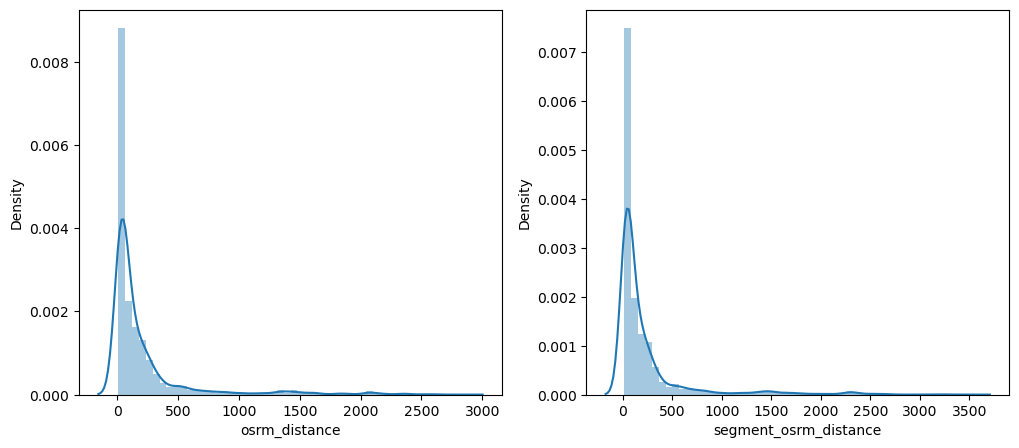

In [148]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.distplot(osrm_distance["osrm_distance"])
              
plt.subplot(122)
sns.distplot(segment_osrm_distance["segment_osrm_distance"])

plt.show()


In [158]:
# Ks Test -
# H0 : The distribution are same
# Ha : The distribution are different

ks_2samp(osrm_distance["osrm_distance"],segment_osrm_distance["segment_osrm_distance"])


KstestResult(statistic=0.03948167645272321, pvalue=1.8042208791084262e-10, statistic_location=50.2941, statistic_sign=1)

In [166]:
ttest_ind(osrm_distance["osrm_distance"].sample(3000), segment_osrm_distance["segment_osrm_distance"].sample(3000),
          alternative="less")


Ttest_indResult(statistic=-2.9450823390487653, pvalue=0.0016205455847776982)

    Significance Level = 0.05 (5%)
    
    As p_value is lesser than significance level, so we reject null hypothesis
    
    which means Mean of OSRM distance is less than mean of segment OSRM distance.
    

    5) Hypothesis Test Between (OSRM Time) vs (Segment OSRM Time)
    
        H0 : Mean time of both are same

        Ha : Mean of Segment OSRM time > Mean of OSRM Time


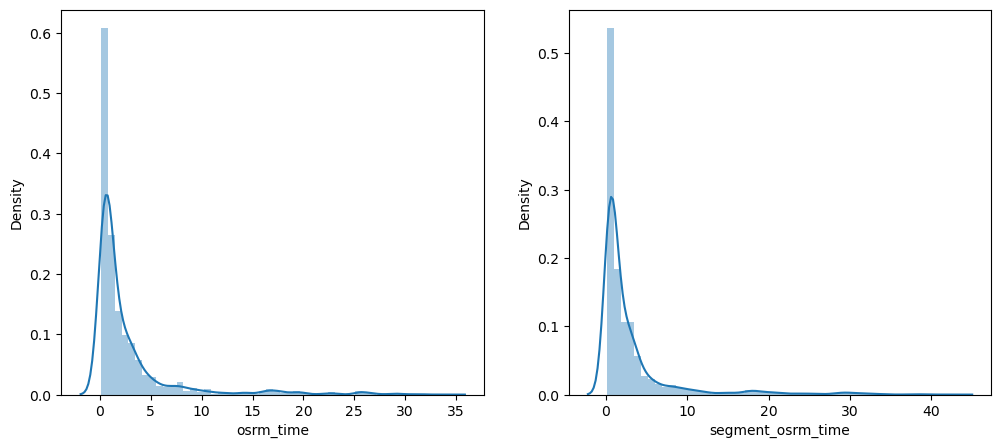

In [157]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.distplot(osrm_time["osrm_time"])

plt.subplot(122)
sns.distplot(segment_osrm_time["segment_osrm_time"])

plt.show()


In [159]:
# Ks Test -
# H0 : The distribution are same
# Ha : The distribution are different

ks_2samp(osrm_time["osrm_time"],segment_osrm_time["segment_osrm_time"])


KstestResult(statistic=0.03509482351353177, pvalue=2.3114982608737022e-08, statistic_location=1.7833333333333334, statistic_sign=1)

In [163]:
ttest_ind( (osrm_time["osrm_time"].sample(2000)), (segment_osrm_time["segment_osrm_time"].sample(2000)),
          alternative ="less") 


Ttest_indResult(statistic=-2.5388434260467254, pvalue=0.0055797797491835355)

    Significance Level = 0.05 (5%)
    
    As p_value is lesser than significance level, so we reject null hypothesis
    
    which means Mean of OSRM time is less than mean of segment OSRM time.
    

**Handling Categorical Variables -**


In [204]:
trips["trip_uuid"].nunique()


14817

In [206]:
trips["route_type"].value_counts()


Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [217]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
col = 'route_type'
trips[col] = label_encoder.fit_transform(trips[col])


In [218]:
trips["route_type"].value_counts()


0    8908
1    5909
Name: route_type, dtype: int64

**Column Normalization / Standardization -**

In [232]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(num_col)
std_data = pd.DataFrame(std_data, columns = num_col.columns)
std_data


,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,2.629468,2.134659,2.146791,2.147264,2.623246,2.625223,2.633784,2.161026,2.121493
1,-0.368643,-0.344679,-0.382742,-0.380733,-0.531357,-0.531689,-0.333670,-0.298780,-0.322940
2,5.595785,5.800407,5.310954,5.327303,5.164314,5.167152,5.573660,5.786003,5.845788
3,-0.524430,-0.539353,-0.530163,-0.530382,-0.654471,-0.653167,-0.488040,-0.482106,-0.499429
4,-0.209676,-0.164697,-0.024976,-0.027989,0.283266,0.283732,-0.183405,-0.121182,-0.156566
...,...,...,...,...,...,...,...,...,...
14812,-0.378181,-0.366717,-0.488813,-0.487625,-0.415377,-0.414767,-0.380078,-0.349265,-0.354359
14813,-0.540327,-0.550372,-0.598480,-0.598080,-0.715035,-0.713906,-0.497133,-0.487544,-0.509117
14814,-0.295518,-0.396102,-0.131047,-0.133099,-0.166331,-0.165737,-0.283991,-0.411705,-0.381814
14815,0.127333,0.081400,-0.172397,-0.165167,-0.278046,-0.278104,0.000795,-0.097370,-0.073295


**Business Insights -**

In [235]:
Number_of_trips_between_cities = (df_copy.groupby(["source_city_state", "destination_city_state"])
                                  ["trip_uuid"].nunique().sort_values(ascending=False).reset_index())
Number_of_trips_between_cities
                                  

,source_city_state,destination_city_state,trip_uuid
0,Bengaluru Karnataka,Bengaluru Karnataka,1369
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
2,Mumbai Maharashtra,Mumbai Maharashtra,361
3,Hyderabad Telangana,Hyderabad Telangana,308
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
...,...,...,...
2298,Jamui Bihar,Munger Bihar,1
2299,Shahjhnpur Uttar Pradesh,Tilhar Uttar Pradesh,1
2300,Nashik Maharashtra,Shrirampur Maharashtra,1
2301,Jamui Bihar,KharagpurBR Bihar,1


- Insights from Data -

        1) Trips happened between source and destination are 14817.

        2) The data belongs to year 2018 & of September and October month.

        3) 60% of the trips routes are carting & remaining 40% consists of FTL

        4) From above table, we can observe that Mumbai Maharashtra, Delhi, Gurgaon(Haryana), Bengaluru Karnataka,

            Hyderabad Telangana, Chennai Tamil Nadu, Ahmedabad Gujarat, Pune Maharashtra, Chandigarh Chandigarh 

            and Kolkata West Bengal are some cities have higest amount of trips happening states with in the city.

    
- Insights from Hypothesis Testing -

        1) Average time_taken_btwn_odstart_and_od_end for population is equal to 
        
            Average start_scan_to_end_scan for population.

        2) Mean of actual time is higher than Mean of the OSRM estimated time for delivery.

        3) Population average for Actual Time taken to complete delivery trip and segment actual time are same.

        4) Average of OSRM distance for population is less than average of segment OSRM distance.
        
        5) Population Mean osrm time is less than Population Mean segment osrm time.

    

**Recommnedations -**


    1) As we can see the difference in OSRM distance & time with respect to actual distance & time,
    
        we need to check the configuration settings of routing engines.
        
    
    2) With states & cities having heavy traffics, company needs to allocate extra resources 
    
        so that delivery will be on time in any seasons.
        
      
    3) Carting should be provided within city range and Heavy Trucks should be assigned for inter-state delivery,
    
        so that we can optimize the delivery time.
        

    4) Optimization can be carried out in scanning time of both ends which is start scanning time 
    
        and end scanning time so that the delivery time can be equated to the OSRM time.
       
       
    5) Company should increase connectivity between different tier cities so that it will reduce the delivery time
    
        and there by increase revenue.
    
    